<a href="https://colab.research.google.com/github/fbeilstein/algorithms/blob/master/lecture_04_data_structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Array and linked list

# Reverse

In [ ]:
# python way 1-liner
def inv0(n):
  return n[::-1]

# move backwards
def inv1(n):
  out = []
  for i in range(len(n)):
    out += [n[-i-1]]
  return out

# recursive
def inv2(n, i=0):
  if i<len(n)/2:
    n[i], n[-i-1] = n[-i-1], n[i]
    inv2(n, i+1)
  return n

# inplace
def inv3(n):
  for i in range(len(n)//2):
    n[i], n[-i-1] = n[-i-1], n[i]
  return n

# recursion weird
def inv4(n, i=0):
  if i<len(n):
    return inv4([n[i]]+n[:i]+n[i+1:], i+1)
  return n

# iteration wierd
def inv5(n):
  for i in range(len(n)):
    n = [n[i]]+n[:i]+n[i+1:]
  return n

# recursion lazy (delayed calculation)
def inv6(n):
  if not n: return []
  return [n[-1]]+inv6(n[:-1])

print(inv0([1,2,3,4,5]))
print(inv1([1,2,3,4,5]))
print(inv2([1,2,3,4,5]))
print(inv3([1,2,3,4,5]))
print(inv4([1,2,3,4,5]))
print(inv5([1,2,3,4,5]))
print(inv6([1,2,3,4,5]))


[5, 4, 3, 2, 1]
[5, 4, 3, 2, 1]
[5, 4, 3, 2, 1]
[5, 4, 3, 2, 1]
[5, 4, 3, 2, 1]
[5, 4, 3, 2, 1]
[5, 4, 3, 2, 1]


In [2]:
class Node:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

def make_linklist(arr):
  head = None
  for a in arr[::-1]:
    head = Node(a, head)
  return head


def print_linklist(head):
  while head:
    print(head.value, end=" ")
    head = head.next

head = make_linklist([1,2,3,4,5])
print_linklist(head)

1 2 3 4 5 

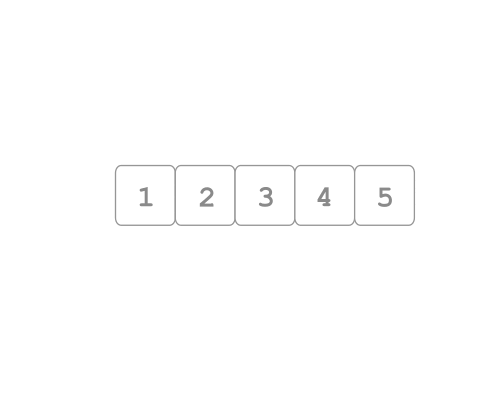

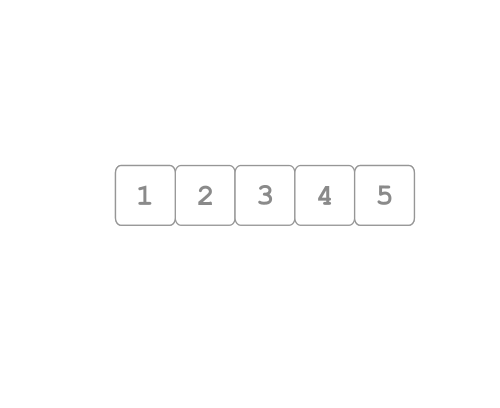

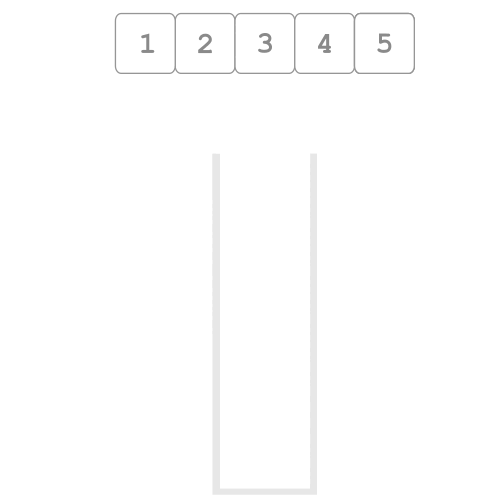

In [4]:
#@title Visualization functions

!pip install lolviz
from IPython.display import clear_output
clear_output()

str_style_bigtbl = '''
<style>
.bigtable {
  border-collapse: collapse;
}

.bigtd {
  border: 3px solid #ffd4d3ff;
  min-width:30px;
  height: 30px;
  position: relative;
  text-align:center;
  color: #474747;
  font-size:20px;
  font-weight: bolder;
  padding: 19px;
}

</style>
'''

str_slide_html = '''
<div style="position:absolute; top:30px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
//var slides = ["slide_1", "slide_2", "slide_3"];

var container = document.getElementById("all_slides");
var menu_conn = document.createElement("div");
menu_conn.style.height = "90px";
menu_conn.id = "menu_div";
container.prepend(menu_conn);

// crutches
var slides = [];
var tmp = container.getElementsByTagName("div");
for (var i = 0; i < tmp.length; ++i)
  if (!tmp[i].id || tmp[i].id != "menu_div")
  {
    tmp[i].classList.add('slide_style');
    slides.push(tmp[i]);
  }


var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;
var menu = [];

function change_slide_to(new_slide_idx)
{
  menu[current_slide].style.borderWidth = "0px";
  var old_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  current_slide = new_slide_idx;
  menu[current_slide].style.borderWidth = "2px";
  var new_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_left()
{
  var new_idx = current_slide - 1;
  if (new_idx < 0) {new_idx = 0;}
  change_slide_to(new_idx);
}

function slide_right()
{
  var new_idx = current_slide + 1;
  if (new_idx >= slides.length) {new_idx = slides.length - 1;}
  change_slide_to(new_idx);
}

function change(obj, is_correct)
{
//   alert(obj.parentNode.rowIndex);
    var rowId = obj.parentNode.rowIndex;
    var table = obj.parentNode.parentNode.parentNode;
    var rowsNotSelected = table.getElementsByTagName('tr');
    for (var row = 0; row < rowsNotSelected.length; row++)
    {
        rowsNotSelected[row].cells[0].style.backgroundColor = "white";
    }
    var rowSelected = table.getElementsByTagName('tr')[rowId];
    if (is_correct > 0)
    {
        rowSelected.cells[0].style.backgroundColor = "#66bb6aa9";
        menu[current_slide].style.backgroundColor = "#66bb6aa9";
    }
    else
    {
        rowSelected.cells[0].style.backgroundColor = "#ff3a3981";
        menu[current_slide].style.backgroundColor = "#ff3a3981";
    }
}

function make_callback(obj, is_correct)
{
  return function() { change(obj, is_correct); }
}

function change_callback(new_idx)
{
  return function() { change_slide_to(new_idx); }
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
slides[current_slide].style.display='block'; //document.getElementById(slides[current_slide]).style.display='block';

// create upper menu
upper_menu = document.getElementById("menu_div");

var tbl      = document.createElement("table");
var tbl_body = document.createElement("tbody");
var tbl_row  = document.createElement("tr");
for (idx = 0; idx < slides.length; idx++)
{
    var tbl_cell = document.createElement("td");
    var cell_text = document.createTextNode(idx+1);
    tbl_cell.appendChild(cell_text);
    tbl_cell.onclick = change_callback(idx);
    tbl_row.appendChild(tbl_cell);
    menu.push(tbl_cell);
    tbl_cell.style.borderWidth = "0px";

    var slide = slides[idx]; //document.getElementById(slides[idx]);
    var all_tables = slide.getElementsByTagName("table");
    for (t_i = 0; t_i < all_tables.length; t_i++)
    {
      var table = all_tables[t_i];
      if (!table.classList.contains("question_style"))
        continue;
      var rows = table.getElementsByTagName('tr');
      for (r_i = 0; r_i < rows.length; r_i++)
      {
        var question_cell = rows[r_i].cells[0];
        question_cell.classList.add("highlight");
        if (question_cell.classList.contains("ok"))
        {
          question_cell.onclick = make_callback(question_cell, 1);
        } else {
          question_cell.onclick = make_callback(question_cell, 0);
        }


        var cell = rows[r_i].insertCell(0);
        cell.width = "50px";
      }
    }
}
tbl_body.appendChild(tbl_row);
tbl.appendChild(tbl_body);
upper_menu.appendChild(tbl);
tbl.classList.add('menu_style');
menu[current_slide].style.borderWidth = "2px";

</script>

<style>
    .slide_style {
      max-width:750px;
      display:none;
      font: 14pt/18pt sans-serif;
      position: static;
      top: 80px;
      left: 0px;
    }

    .question_style {
        width:600px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }
    .question_style td{
        padding:7px;
        height: 50px;
        border:#4e95f4 0px solid;
        text-align:left;
        font: 13pt/16pt sans-serif;
    }
    .highlight:hover{
        background-color: #00000019
    }
    .menu_style {
        height:50px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }
    .menu_style td{
        width:50px;
        padding:7px;
        border:#787878ff solid;
        text-align:center;
        font: 16pt/14pt sans-serif;
        color: #606060ff;
    }
</style>
'''

all_slides = []

def publish_slides():
  result = '<div id="all_slides">'
  global all_slides
  for e in all_slides:
    result += '<div>\n' + e + '\n</div>\n'
  result += '</div>\n'
  all_slides = []
  import IPython
  from google.colab import output
  display(IPython.display.HTML(str_style_bigtbl + str_slide_html + result))

def append_slide(dict_vars):
  from lolviz import objviz
  import graphviz
  g = objviz(dict_vars)
  src = graphviz.Source(g.source)
  global all_slides
  all_slides += [src.pipe(format='svg').decode("utf-8")]

In [5]:
class Node:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

def reverse(head):
  curr = head
  append_slide({"head": head, "X:": curr})
  while curr.next:
    head, head.next, curr.next = curr.next, head, curr.next.next
    append_slide({"head": head, "X:": curr})



reverse(make_linklist([1,2,3,4,5]))
publish_slides()

# Midpoint

In [16]:
lis = make_linklist([1,2,3,4])

def midpoint_arr(arr):
  return arr[len(arr)//2]


def midpoint(head):
  fast, slow = head, head
  while fast and fast.next:
    slow = slow.next
    fast = fast.next.next
  return slow.value


print(midpoint_arr([1,2,3,4,5,])), print(midpoint(lis))

3
3


(None, None)

# Stack, queue, deque

# Unordered map

# Trees

# Graphs

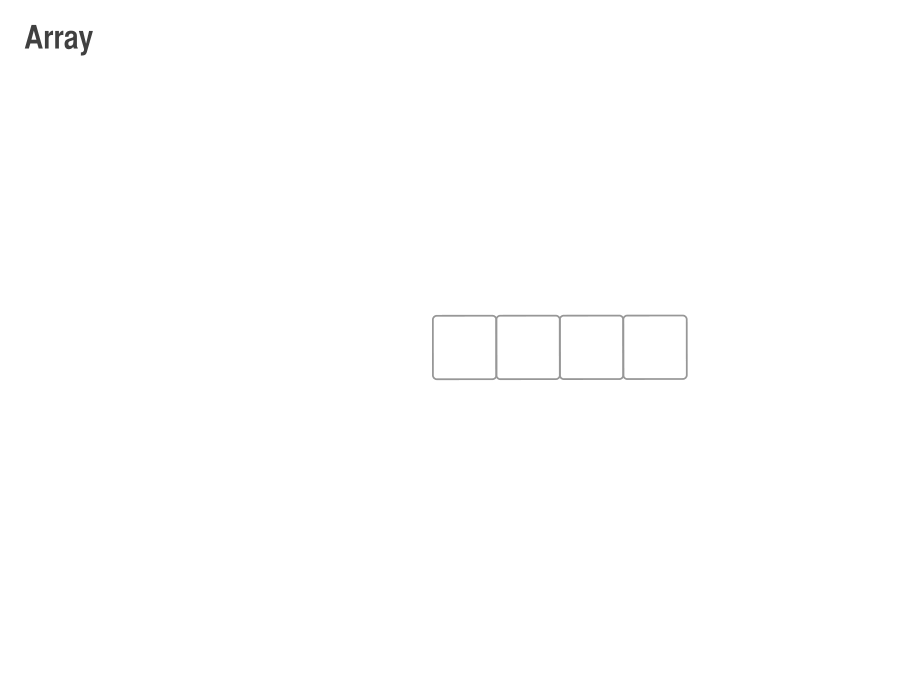